# Bracketing Methods (Bisection example)

Consider the refrigeration tank example from Belegundu and Chandrupatla [ref].
We want to minimize the cost of a cylindrical refrigeration tank that must have
a volume of 50 m$^3$.
The costs of the tank are
- Circular ends cost \$10 per m$^2$
- Cylindrical walls cost \$6 per m$^2$
- Refrigerator costs \$80 per m$^2$ over its life

Let $d$ be the tank diameter, and $L$ the height.

\begin{align}
  f &= 10  \left(\frac{2 \pi d^2}{4}\right) + 6 (\pi d L) + 80 \left( \frac{2
\pi d^2}{4} + \pi d L \right)\\
  &= 45 \pi d^2 + 86 \pi d L
\end{align}

However, $L$ is a function of $d$ because the volume is constrained.  We could
add a constraint to the problem
\begin{align}
  \frac{\pi d^2}{4} L = V
\end{align}
but it is easier to express $V$ as a function of $d$ and make the problem
unconstrained.
\begin{align}
  L &= \frac{4 V}{\pi d^2}\\
  &= \frac{200}{\pi d^2}
\end{align}
Thus the optimization can be expressed as
\begin{align*}
\textrm{minimize} &\quad 45 \pi d^2 + \frac{17200}{d}\\
\textrm{with respect to} &\quad d \\
\textrm{subject to} &\quad d \ge 0
\end{align*}

One-dimensional optimization problems are silly of course, we can just find the
minimum by looking at a plot.  However, we use a one-dimensional example to
illustrate line searches.  A line search seeks an approximate minimum to a one-dimensional optimization problem within a N-dimensional space.

We will use bisection to find the minimum of this function.  This is a recursive
function.


In [1]:
from math import fabs

def bisection(x1, x2, f1, f2, fh, sizevec):
    """
    This function finds the root of a function using bisection.
    
    Parameters
    ----------
    x1 : float
        lower bound
    x2 : float
        upper bound
    f1 : float
        function value at lower bound
    f2 : float
        function value at upper bound
        f1 * f2 must be < 0 in order to contain a root.  
        Currently this is left up to the user to check.
    fh : function handle
        should be of form f = fh(x)
        where f is the function value
    sizevec : list 
        input an empty array and the interval size
        will be appended at each iteration
        
    Returns
    -------
    xroot : float
        root of function fh
    
    """

    # divide interval in half
    x = 0.5*(x1 + x2)
    
    # save in iteration history    
    sizevec.append(x2-x1)

    # if interval is small, then we have converged
    if (fabs(x2 - x1) < 1e-6):
        return x

    # evaluate function at the new point (midpoint of interval)
    f = fh(x)

    # determine which side of the interval are root is in
    if (f*f1 < 0):  # left brack applies
        x2 = x
        f2 = f
    else:  # right bracket applies
        x1 = x
        f1 = f
    
    # recursively call bisection with our new interval
    return bisection(x1, x2, f1, f2, fh, sizevec)

We are interseted in optimization, so we don't want to find the root of our
function, but rather the "root" of the derivative as a potential minimum point.
Let's define our objectve function, its derivative, and solve for the minium.

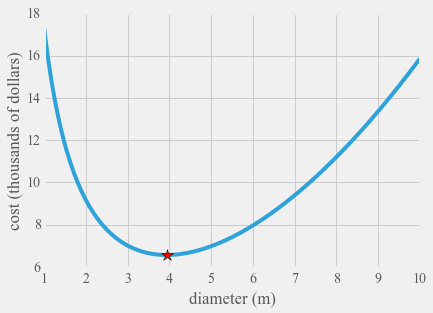

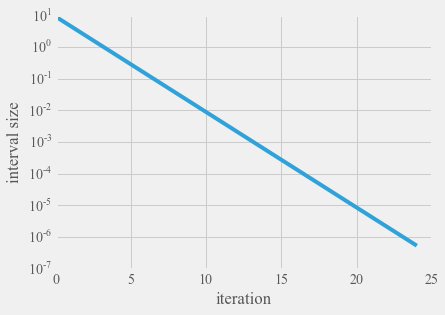

In [10]:
%matplotlib inline

import numpy as np
from math import pi
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def func(d):
    return 45*pi*d**2 + 17200.0/d


def deriv(d):
    return 90*pi*d - 17200.0/d**2



# choose starting interval
d1 = 1.0
d2 = 10.0

# evalaute function
g1 = deriv(d1)
g2 = deriv(d2)

# check that our bracket is ok
assert(g1*g2 < 0)

# find optimal point
size = []
dopt = bisection(d1, d2, g1, g2, deriv, size)

# plot function
dvec = np.linspace(d1, d2, 200)
plt.figure()
plt.plot(dvec, func(dvec)/1e3)
plt.plot(dopt, func(dopt)/1e3, 'r*', markersize=12)
plt.xlabel('diameter (m)')
plt.ylabel('cost (thousands of dollars)')

# plot convergence history (interval size)
plt.figure()
plt.semilogy(size)
plt.xlabel('iteration')
plt.ylabel('interval size')

Note the linear convergence behavior.